# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
# dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())
%load_ext autoreload
%autoreload 2
%tb

current working dirE:\AV\DataSetExploration\drone-dataset-tools\src


No traceback available to show.


In [3]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")

from extractors.loader import Loader
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(None)


Bad key "text.kerning_factor" on line 4 in
C:\Users\adhocmaster\.conda\envs\drone\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [10]:
from extractors.LocationData import LocationData
sceneData = LocationData.load("../data/location-2/home", "2022-12-09-fps-5-scene-10.dill")
pedDf = sceneData.getPedDataInSceneCoordinates()
otherDf = sceneData.getOtherDataInSceneCoordinates()
sceneMeta = sceneData.getMeta()

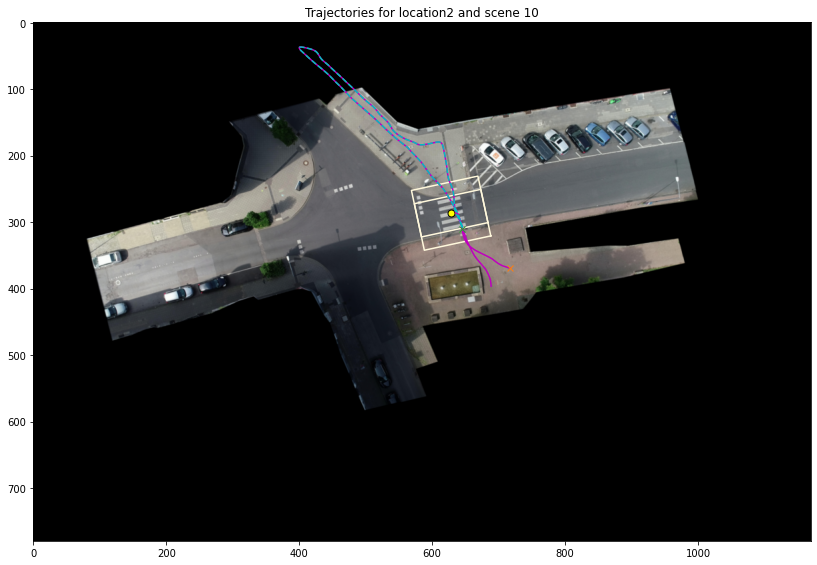

In [9]:
visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=True, ids=[26167])

In [11]:
ped26167 = pedDf[pedDf["uniqueTrackId"]==26167]

In [14]:
ped26167.to_csv("../data/location-2/problemTracks/ped26167.csv")

In [15]:
# visualize all peds
from math import ceil
allPedIds = sceneData.uniquePedIds()
# limit = 50
# nPedIds = len(allPedIds)
# nPages = ceil(nPedIds / limit)
# for page in range(nPages):
#     offset = page * limit
#     visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=False, offset=offset, limit=limit)

In [16]:
problemId = allPedIds[411]
problemTrack = pedDf[pedDf["uniqueTrackId"] == problemId]
problemId

26167

In [17]:
print(TrajectoryUtils.length(problemTrack, xCol="sceneX", yCol="sceneY"))

75.64104831812149


In [18]:
print(allPedIds)

<IntegerArray>
[18023, 18042, 18053, 18069, 18090, 18107, 18112, 18121, 18127, 18134,
 ...
 29530, 29531, 29532, 29533, 29534, 29542, 29554, 29559, 29575, 29579]
Length: 628, dtype: Int64


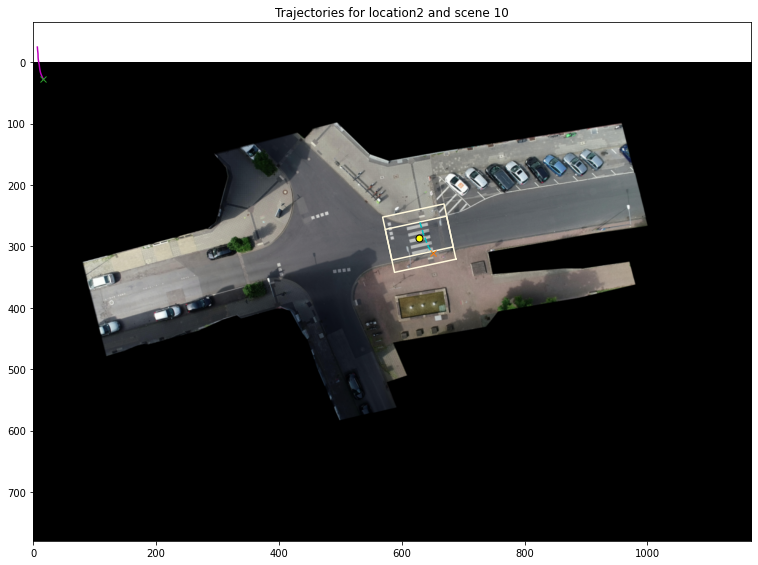

In [27]:
trackDf = pedDf[pedDf["uniqueTrackId"] == 18042]
visualizer.showLocationSceneData(sceneData, onlyClipped=True, showLocal=True, showOthers=True, ids=[18023])

In [22]:
xCol = "sceneX"
yCol = "sceneY"
firstRow = trackDf.iloc[0]
originX = firstRow[xCol]
originY = firstRow[yCol]
print(originX, originY)

0.6335057848067879 2.4068186041777935


In [28]:
trackDf.head(5)

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,...,yAcceleration,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
23,215,18,42,1638,275,62.76175,-30.07525,112.73113,0.0,0.0,...,0.10289,18042,10,5.0,0.856664,-2.297478,0.186992,-1.033906,0.244926,0.029274
24,216,18,42,1643,280,62.69207,-29.87586,111.57663,0.0,0.0,...,0.08207,18042,10,5.0,0.830584,-2.087880,0.130400,-1.047992,0.282957,0.070432
25,217,18,42,1648,285,62.62496,-29.66462,110.69692,0.0,0.0,...,0.03145,18042,10,5.0,0.809514,-1.867240,0.105348,-1.103202,0.125259,0.276047
26,218,18,42,1653,290,62.55744,-29.45232,110.07579,0.0,0.0,...,-0.01731,18042,10,5.0,0.788267,-1.645477,0.106235,-1.108815,-0.004433,0.028065
27,219,18,42,1658,295,62.48303,-29.24562,109.68850,0.0,0.0,...,-0.03878,18042,10,5.0,0.759105,-1.427735,0.145813,-1.088707,-0.197893,-0.100541


In [24]:
trackDf["localX"] = trackDf[xCol] - originX
trackDf["localY"] = trackDf[yCol] - originY

C:\Users\adhocmaster\.conda\envs\drone\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\adhocmaster\.conda\envs\drone\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
